This jupyter notebook licensed with CC-BY-NC. See https://gitlab.com/awsteiner/ugastro_ipynb/blob/master/LICENSE.md for details.

Initializations:

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import random
import math
import matplotlib.patches as patches
import sympy
import csv

## Read exoplanet data file

In [3]:
# Name of host star
star_name=[]
# Planet name
name=[]
# Number of planets
n_planets=[]
# Period (days)
period=[]
# Orbital semi-major axis (AU)
amax=[]
# Orbital eccentricity
eccen=[]
# Inclination (degrees)
incl=[]
# Mass (Jupiter masses)
mass=[]
# Radii (Jupiter radii)
rad=[]
# Density (g/cm^3)
dens=[]
# Right ascension (decimal degrees)
ra=[]
# Declination (decimal degrees)
dec=[]
# Distance (parsecs)
dist=[]
# Stellar temperature
star_temp=[]
# Discovery method
method=[]
with open('data/planets.csv', 'r') as csvfile:
    preader = csv.reader(csvfile)
    for row in preader:
        star_name.append(row[0])
        name.append(row[2])
        method.append(row[3])
        n_planets.append(row[5])
        period.append(row[6])
        amax.append(row[7])
        eccen.append(row[8])
        incl.append(row[9])
        mass.append(row[10])
        rad.append(row[12])
        dens.append(row[13])
        ra.append(row[19])
        dec.append(row[21])
        dist.append(row[22])   
        star_temp.append(row[27])
print(len(star_name))

4099


## The details of the CSV data file

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Fri Nov 22 06:03:18 2019

COLUMN pl_hostname:    Host Name

COLUMN pl_letter:      Planet Letter

COLUMN pl_name:        Planet Name

COLUMN pl_discmethod:  Discovery Method

COLUMN pl_controvflag: Controversial Flag

COLUMN pl_pnum:        Number of Planets in System

COLUMN pl_orbper:      Orbital Period [days]

COLUMN pl_orbsmax:     Orbit Semi-Major Axis [AU])

COLUMN pl_orbeccen:    Eccentricity

COLUMN pl_orbincl:     Inclination [deg]

COLUMN pl_bmassj:      Planet Mass or M*sin(i) [Jupiter mass]

COLUMN pl_bmassprov:   Planet Mass or M*sin(i) Provenance

COLUMN pl_radj:        Planet Radius [Jupiter radii]

COLUMN pl_dens:        Planet Density [g/cm**3]

COLUMN pl_ttvflag:     TTV Flag

COLUMN pl_kepflag:     Kepler Field Flag

COLUMN pl_k2flag:      K2 Mission Flag

COLUMN pl_nnotes:      Number of Notes

COLUMN ra_str:         RA [sexagesimal]

COLUMN ra:             RA [decimal degrees]

COLUMN dec_str:        Dec [sexagesimal]

COLUMN dec:            Dec [decimal degrees]

COLUMN st_dist:        Distance [pc]

COLUMN gaia_dist:      Gaia Distance [pc]

COLUMN st_optmag:      Optical Magnitude [mag]

COLUMN st_optband:     Optical Magnitude Band

COLUMN gaia_gmag:      G-band (Gaia) [mag]

COLUMN st_teff:        Effective Temperature [K]

COLUMN st_mass:        Stellar Mass [Solar mass]

COLUMN st_rad:         Stellar Radius [Solar radii]

COLUMN rowupdate:      Date of Last Update

COLUMN pl_facility:    Discovery Facility

## Fix automatic scrollbar generation

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Simple mass and radius plot:

First, we have to 'clean' the data a bit. Many of the planets in the data 
file don't yet have mass or radius measurements. Thus we have to omit
rows for which either the mass or radius is empty. Also, the CSV reader
reads the table as strings, and we have to convert those strings to 
numbers. This little code snippet creates new arrays, 'mass2' and 'rad2'
which are thus 'cleaned'. At the end, we print the first 20 entries of
both arrays, which helps verify that our code worked. Since we're using
append(), it's very important to start by initializing the lists with
an empty list. 

In [5]:
mass2=[]
rad2=[]
for i in range(0,len(mass)):
    if rad[i] is not '' and mass[i] is not '':
        mass2.append(float(mass[i]))
        rad2.append(float(rad[i]))
print(mass2[0:20])
print(rad2[0:20])

[13.9, 20.95, 0.02542, 0.07, 17.0, 1.03, 2.75, 2.33, 0.917, 1.308, 7.6, 0.535, 2.43, 3.47, 1.11, 3.47, 2.26, 0.038, 2.8, 0.018]
[1.44, 0.92, 0.17, 0.23, 2.2, 1.49, 0.97, 1.43, 1.44, 0.885, 1.09, 1.17, 1.02, 1.31, 1.29, 1.466, 1.3, 0.435, 1.05, 0.33]


The plotting code is below. You can change the 'figsize' to make the plot either larger or smaller as you like. You may also need to set the x and y limits. We use scatter() to make the plot. One of the most critical choices is 'log' vs. 'linear'. We show below both log and linear scaling for the x axis.

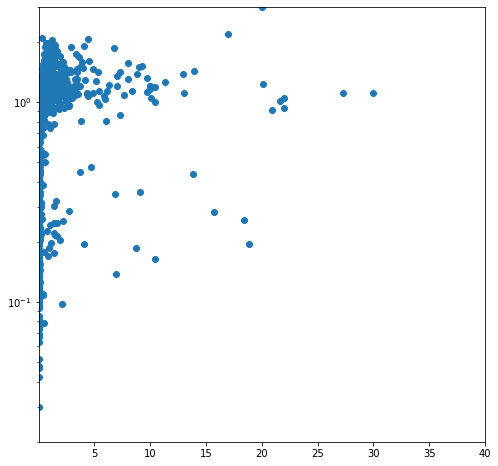

In [6]:
fig=plot.figure(figsize=(8,8))
ax=plot.gca()
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim([1.0e-4,4.0e1])
ax.set_ylim([2.0e-2,3.0e0])
ax.scatter(mass2,rad2)
plot.show()

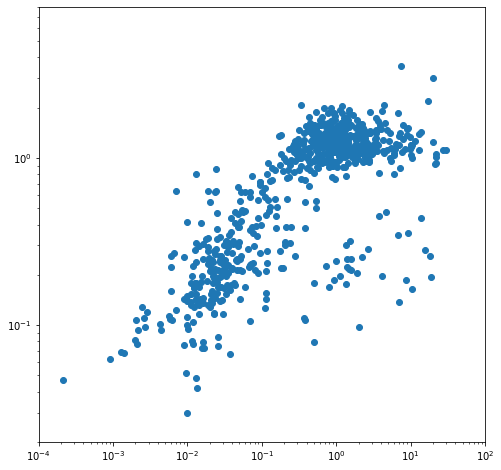

In [7]:
fig=plot.figure(figsize=(8,8))
ax=plot.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-4,1.0e2])
ax.set_ylim([2.0e-2,8.0e0])
ax.scatter(mass2,rad2)
plot.show()

<font color="blue">Task 1: In the cell below, explain where to find the "hot jupiters" in this plot and how you found them there?</font>

## Color according to log of density:

The "scatter()" function takes two additional arguments, size and color. We can either specify an array or a value. In this case, we choose a fixed size, but color the points by the *logarithm* of the density. In order
to do that, we need to create a new array "ldens2", which stores the logarithm of the density. 

In [8]:
mass2=[]
rad2=[]
ldens2=[]
for i in range(0,len(mass)):
    if rad[i] is not '' and mass[i] is not '' and dens[i] is not '':
        mass2.append(float(mass[i]))
        rad2.append(float(rad[i]))
        ldens2.append(np.log(float(dens[i])))
print(mass2[0:20])
print(rad2[0:20])
print(ldens2[0:20])

[0.02542, 1.03, 2.75, 2.33, 0.917, 1.308, 7.6, 0.535, 2.43, 3.47, 1.11, 3.47, 2.26, 0.038, 2.8, 0.018, 0.088, 0.27, 0.52, 10.39]
[0.17, 1.49, 0.97, 1.43, 1.44, 0.885, 1.09, 1.17, 1.02, 1.31, 1.29, 1.466, 1.3, 0.435, 1.05, 0.33, 0.44, 1.08, 1.26, 1.007]
[1.8562979903656263, -0.9675840262617056, 1.308332819650179, -0.01005033585350145, -0.8891620644859025, 0.85015092936961, 1.9878743481543455, -0.8209805520698302, 1.0367368849500223, 0.7884573603642703, -0.342490308946776, 0.3852624007906449, 0.3074846997479607, -1.3903023825174294, 1.0986122886681098, -0.10536051565782628, 0.26236426446749106, -1.8971199848858813, -1.2729656758128873, 2.533696813957432]


Now we make the new plot and include some axis labels for convenience.

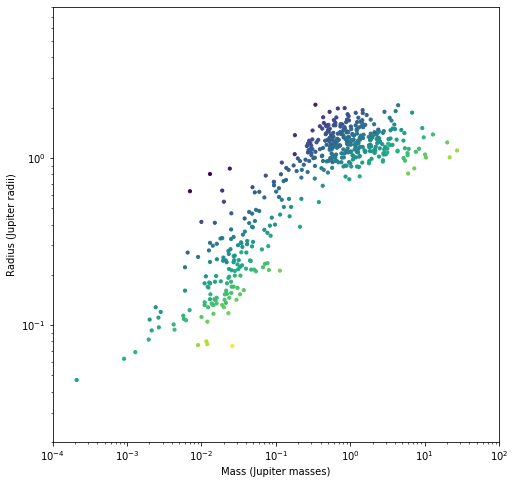

In [9]:
fig=plot.figure(figsize=(8,8))
ax=plot.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-4,1.0e2])
ax.set_ylim([2.0e-2,8.0e0])
ax.set_xlabel('Mass (Jupiter masses)')
ax.set_ylabel('Radius (Jupiter radii)')
ax.scatter(mass2,rad2,10,ldens2)
plot.show()

<font color="blue">Task 2: Why does the density vary from the lower right to the upper left in this plot?</font>

<font color="blue">Task 3: Where would Earth be in this plot?</font>

## More plots!

<font color="blue">Task 4: Make at least 3 more plots of planetary quantities above and explain why they look the way they do. In particular, think about the difference between the kinds of exoplanets which we can observe, versus the kinds of exoplanets which actually exist.</font>

## Demonstration plot

In [10]:
mass2=[]
rad2=[]
method2=[]
method_list=sorted(set(method))
for i in range(0,len(mass)):
    if rad[i] is not '' and mass[i] is not '' and dens[i] is not '':
        mass2.append(float(mass[i]))
        rad2.append(float(rad[i]))
        method2.append(method_list.index(method[i]))
print(mass2[0:20])
print(rad2[0:20])
print(method2[0:20])

[0.02542, 1.03, 2.75, 2.33, 0.917, 1.308, 7.6, 0.535, 2.43, 3.47, 1.11, 3.47, 2.26, 0.038, 2.8, 0.018, 0.088, 0.27, 0.52, 10.39]
[0.17, 1.49, 0.97, 1.43, 1.44, 0.885, 1.09, 1.17, 1.02, 1.31, 1.29, 1.466, 1.3, 0.435, 1.05, 0.33, 0.44, 1.08, 1.26, 1.007]
[8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


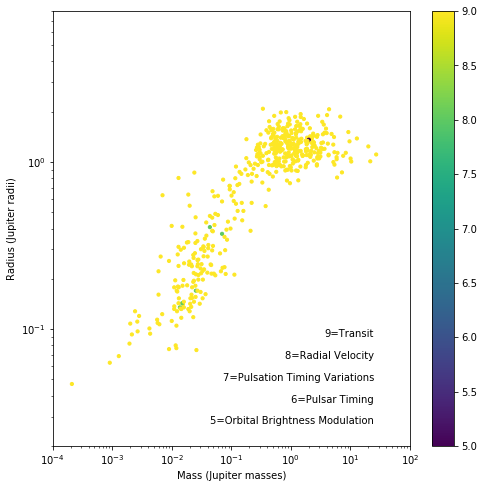

In [11]:
fig=plot.figure(figsize=(8,8))
ax=plot.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-4,1.0e2])
ax.set_ylim([2.0e-2,8.0e0])
ax.set_xlabel('Mass (Jupiter masses)')
ax.set_ylabel('Radius (Jupiter radii)')
sc=ax.scatter(mass2,rad2,10,method2)
cbar=fig.colorbar(sc)
ax.text(0.9,0.05,'5='+method_list[5],transform=ax.transAxes,ha='right')
ax.text(0.9,0.1,'6='+method_list[6],transform=ax.transAxes,ha='right')
ax.text(0.9,0.15,'7='+method_list[7],transform=ax.transAxes,ha='right')
ax.text(0.9,0.2,'8='+method_list[8],transform=ax.transAxes,ha='right')
ax.text(0.9,0.25,'9='+method_list[9],transform=ax.transAxes,ha='right')
plot.show()